## Exercise: Outlier removal using standard deviation and z score

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
pd.set_option('display.float_format', '{:,.1f}'.format)

In [29]:
df = pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,"1,056.0",2,39.1,2,3699
1,Chikka Tirupathi,4 Bedroom,"2,600.0",5,120.0,4,4615
2,Uttarahalli,3 BHK,"1,440.0",2,62.0,3,4305
3,Lingadheeranahalli,3 BHK,"1,521.0",3,95.0,3,6245
4,Kothanur,2 BHK,"1,200.0",2,51.0,2,4250


We will quickly examine price_per_sqft column to check min,max,mean and percentile values

In [30]:
df.price_per_sqft.describe()

count       13,200.0
mean         7,920.3
std        106,727.2
min            267.0
25%          4,267.0
50%          5,438.0
75%          7,317.0
max     12,000,000.0
Name: price_per_sqft, dtype: float64

Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

Also plot histogram to see how is the data distribution

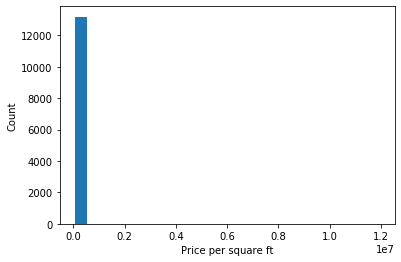

In [31]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count');

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using log scale can make visualization little better

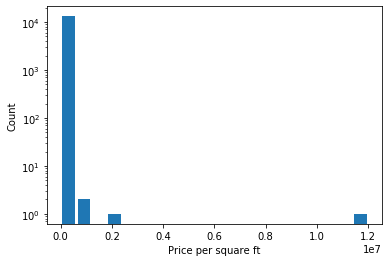

In [32]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log');

You see atleast few bars on right hand side of our highest building at least :)

## (1) Treat outliers using percentile first

In [33]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000099)

In [34]:
outliers = df[(df.price_per_sqft < lower_limit) | (df.price_per_sqft > upper_limit) ]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
11447,Whitefield,4 Bedroom,60.0,4,218.0,4,363333
5597,JP Nagar,2 BHK,"1,100.0",1,15.0,2,1363
5417,Ulsoor,4 BHK,"36,000.0",4,450.0,4,1250
8307,Bannerghatta Road,5 BHK,"2,500.0",4,"1,400.0",5,56000
1867,other,3 Bedroom,"52,272.0",2,140.0,3,267
7799,other,4 BHK,"2,000.0",3,"1,063.0",4,53150
7012,other,1 BHK,650.0,1,500.0,1,76923
11635,Begur,3 BHK,"2,400.0",3,12.0,3,500
1005,other,1 BHK,15.0,1,30.0,1,200000
7862,JP Nagar,3 BHK,"20,000.0",3,175.0,3,875


Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [35]:
df2 = df[(df.price_per_sqft >= lower_limit) & (df.price_per_sqft <= upper_limit)]
df2.shape

(13172, 7)

In [36]:
df.shape

(13200, 7)

In [37]:
df.shape[0] - df2.shape[0]

28

We removed total 28 outliers

## 2) Now remove outliers using 4 standard deviation

In [38]:
max_limit = df2.price_per_sqft.mean() + 4 * df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4 * df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [42]:
df2[(df2.price_per_sqft < min_limit) | (df2.price_per_sqft > max_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1705,other,4 Bedroom,"1,700.0",2,550.0,4,32352
10000,other,6 Bedroom,"1,200.0",5,280.0,6,23333
12607,HAL 2nd Stage,8 Bedroom,"1,000.0",7,260.0,8,26000
3420,other,3 Bedroom,"1,350.0",3,380.0,3,28148
12051,Malleshwaram,5 Bedroom,"3,000.0",4,900.0,5,30000
8483,HSR Layout,8 Bedroom,800.0,8,285.0,8,35625
13081,other,6 Bedroom,"8,000.0",6,"2,800.0",6,35000
3401,Indira Nagar,6 Bedroom,"2,480.0",4,750.0,6,30241
13185,Hulimavu,1 BHK,500.0,1,220.0,1,44000
8083,other,3 BHK,"2,750.0",3,943.0,3,34290


In [43]:
df3 = df2[(df2.price_per_sqft >= min_limit) & (df2.price_per_sqft <= max_limit)]
df3.shape

(13047, 7)

In [44]:
df2.shape[0]-df3.shape[0]

125

In this step we removed total 125 outliers

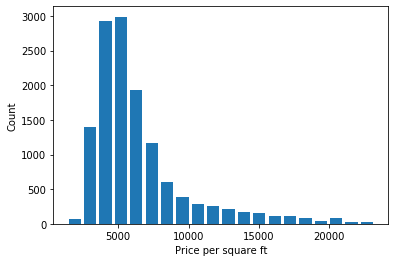

In [45]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count');

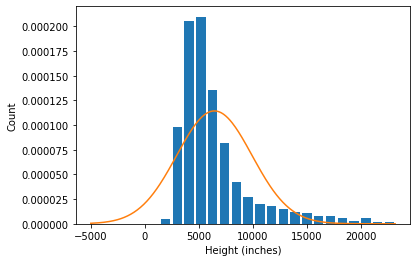

In [46]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()));

## (3) Now remove outliers using z score. Use z score of 4 as your thresold

In [47]:
df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean()) / df2.price_per_sqft.std()
df2.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
5708,Thanisandra,3 BHK,"1,917.0",4,100.0,3,5216,-0.3
717,other,5 Bedroom,"1,210.0",4,160.0,5,13223,1.6
3085,Gunjur,4 Bedroom,"2,000.0",3,95.0,4,4750,-0.5
7500,Malleshpalya,2 BHK,"1,421.0",2,90.0,2,6333,-0.1
7519,Anjanapura,2 BHK,950.0,2,32.0,2,3368,-0.8
11751,Jakkur,3 BHK,"1,485.0",3,72.0,3,4848,-0.4
10032,Padmanabhanagar,3 Bedroom,610.0,2,75.0,3,12295,1.4
6121,Electronics City Phase 1,1 BHK,635.0,1,26.0,1,4094,-0.6
10022,Banashankari Stage III,3 BHK,"1,500.0",2,100.0,3,6666,0.0
6156,Yelahanka,3 BHK,"1,556.0",3,86.0,3,5526,-0.3


In [18]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore > 4)]
outliers_z.shape

(125, 8)

In [48]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
13078,other,4 Bedroom,"9,200.0",4,"2,600.0",4,28260,5.2
7808,other,5 Bedroom,"2,400.0",5,625.0,5,26041,4.7
5974,other,4 Bedroom,"2,360.0",4,650.0,4,27542,5.0
978,Rajaji Nagar,4 Bedroom,315.0,4,90.0,4,28571,5.3
12051,Malleshwaram,5 Bedroom,"3,000.0",4,900.0,5,30000,5.6


In [49]:
df4 = df2[(df2.zscore > -4) & (df2.zscore < 4)]
df4.shape

(13047, 8)

In [50]:
df2.shape[0] - df4.shape[0]

125